In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import graphviz
from graphviz import Source
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import preprocessing

In [2]:
ls

 Volume in drive C is Acer
 Volume Serial Number is 3E7E-200F

 Directory of C:\Users\kalyani raghavendra

23-07-2020  12.48 PM    <DIR>          .
23-07-2020  12.48 PM    <DIR>          ..
17-10-2019  02.42 PM    <DIR>          .anaconda
20-07-2020  03.52 PM    <DIR>          .conda
16-06-2020  05.06 PM                43 .condarc
18-01-2020  12.52 PM    <DIR>          .config
19-04-2020  04.41 PM               186 .gitconfig
20-07-2020  02.53 PM    <DIR>          .ipynb_checkpoints
17-10-2019  02.45 PM    <DIR>          .ipython
17-10-2019  02.48 PM    <DIR>          .jupyter
17-10-2019  02.47 PM    <DIR>          .matplotlib
05-04-2020  11.55 AM    <DIR>          .spyder-py3
22-07-2020  11.39 AM    <DIR>          3D Objects
23-07-2020  10.58 AM         2,699,740 all_merged.csv
20-07-2020  03.52 PM    <DIR>          Anaconda3
13-07-2020  11.35 AM           228,664 Assignment.ipynb
22-07-2020  11.39 AM    <DIR>          Contacts
22-07-2020  11.39 AM    <DIR>          Desktop
22-07-2020

In [3]:
user_table = pd.read_csv('C:/Users/kalyani raghavendra/Desktop/Mini Project/user_table.csv')
print(len(user_table))
user_table.head()
user_table['date'] = pd.to_datetime(user_table['date'])
user_table['year'] = pd.DatetimeIndex(user_table['date']).year
user_table['month'] = pd.DatetimeIndex(user_table['date']).month
user_table['day_of_week'] = pd.DatetimeIndex(user_table['date']).dayofweek
user_table.drop(['date'], axis = 1, inplace = True)
user_table.head()

90400


,user_id,device,sex,year,month,day_of_week
0,450007,Desktop,Female,2015,2,5
1,756838,Desktop,Male,2015,1,1
2,568983,Desktop,Male,2015,9,4
3,190794,Desktop,Female,2015,2,2
4,537909,Desktop,Male,2015,1,3


In [4]:
print(user_table['year'].unique())

[2015]


In [5]:
user_table.drop(['year'], axis = 1, inplace = True)

In [6]:
home_page_table = pd.read_csv('C:/Users/kalyani raghavendra/Desktop/Mini Project/home_page_table.csv')
print(len(home_page_table), len(home_page_table)/len(home_page_table))
print(home_page_table.head())
search_page_table = pd.read_csv('C:/Users/kalyani raghavendra/Desktop/Mini Project/search_page_table.csv')
print(len(search_page_table), len(search_page_table)/len(home_page_table))
print(search_page_table.head())
payment_page_table = pd.read_csv('C:/Users/kalyani raghavendra/Desktop/Mini Project/payment_page_table.csv')
print(len(payment_page_table), len(payment_page_table)/len(home_page_table))
print(payment_page_table.head())
payment_confirmation_table = pd.read_csv('C:/Users/kalyani raghavendra/Desktop/Mini Project/payment_confirmation_table.csv')
print(len(payment_confirmation_table), len(payment_confirmation_table)/len(home_page_table))
print(payment_confirmation_table.head())

90400 1.0
   user_id       page
0   313593  home_page
1   468315  home_page
2   264005  home_page
3   290784  home_page
4   639104  home_page
45200 0.5
   user_id         page
0    15866  search_page
1   347058  search_page
2   577020  search_page
3   780347  search_page
4   383739  search_page
6030 0.06670353982300885
   user_id          page
0   253019  payment_page
1   310478  payment_page
2   304081  payment_page
3   901286  payment_page
4   195052  payment_page
452 0.005
   user_id                       page
0   123100  payment_confirmation_page
1   704999  payment_confirmation_page
2   407188  payment_confirmation_page
3   538348  payment_confirmation_page
4   841681  payment_confirmation_page


In [7]:
def dummy_df(df, df_list):
    for i in df_list:
        df = pd.get_dummies(pd.merge(df, i, on = ['user_id'], how = 'left'), prefix_sep = '_', columns = ['page'])
    return df
df_list = [home_page_table, search_page_table, payment_page_table, payment_confirmation_table]
df = dummy_df(user_table, df_list)
df.head()

,user_id,device,sex,month,day_of_week,page_home_page,page_search_page,page_payment_page,page_payment_confirmation_page
0,450007,Desktop,Female,2,5,1,0,0,0
1,756838,Desktop,Male,1,1,1,0,0,0
2,568983,Desktop,Male,9,4,1,1,0,0
3,190794,Desktop,Female,2,2,1,1,0,0
4,537909,Desktop,Male,1,3,1,0,0,0


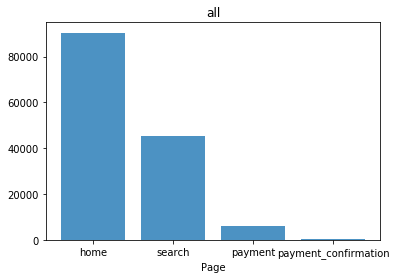

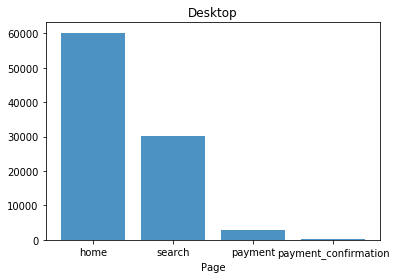

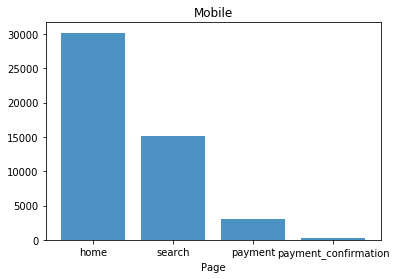

In [8]:
def funnel_chart(df, columns, Title):
    counts = []
    for i in columns:
        counts.append(len(df.loc[df[i] == 1][i]))
    y_pos = np.arange(1, len(counts)+1)
    plt.bar(y_pos, counts, align= 'center', alpha = 0.8)
    plt.xticks(y_pos, ['home', 'search','payment','payment_confirmation'])
    plt.xlabel('Page')
    plt.title(Title)
    plt.show()
page_list = ['page_home_page', 'page_search_page', 'page_payment_page', 'page_payment_confirmation_page']
funnel_chart(df, page_list, 'all')
funnel_chart(df.loc[df['device'] == 'Desktop'], page_list, 'Desktop')
funnel_chart(df.loc[df['device'] == 'Mobile'], page_list, 'Mobile')

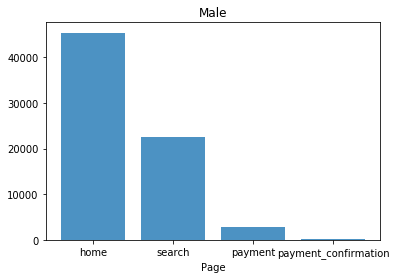

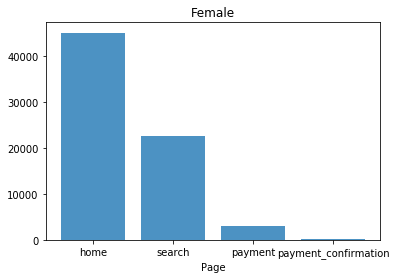

In [9]:
funnel_chart(df.loc[df['sex'] == 'Male'], ['page_home_page', 'page_search_page', 'page_payment_page', 
                                           'page_payment_confirmation_page'], 'Male')
funnel_chart(df.loc[df['sex'] == 'Female'], ['page_home_page', 'page_search_page', 'page_payment_page', 
                                           'page_payment_confirmation_page'], 'Female')

In [10]:
le = preprocessing.LabelEncoder()
le.fit(df['device'])
df['device'] = le.transform(df['device'])

le.fit(df['sex'])
df['sex'] = le.transform(df['sex'])

df.head()

,user_id,device,sex,month,day_of_week,page_home_page,page_search_page,page_payment_page,page_payment_confirmation_page
0,450007,0,0,2,5,1,0,0,0
1,756838,0,1,1,1,1,0,0,0
2,568983,0,1,9,4,1,1,0,0
3,190794,0,0,2,2,1,1,0,0
4,537909,0,1,1,3,1,0,0,0


In [11]:
df.to_csv('all_merged.csv')

In [12]:
df_payment_conf_mobile = df.loc[df['device'] == 1].drop(['user_id', 'device', 'page_home_page', 'page_search_page',
                                                         'page_payment_page', 'page_payment_confirmation_page'], axis = 1)
tree = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 30, class_weight = 'balanced', min_impurity_decrease = 0.001)
tree.fit(df_payment_conf_mobile, df.loc[df['device'] == 1]['page_payment_confirmation_page'])

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.001, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [13]:
export_graphviz(tree, out_file = "tree_payment_conf_mobile.dot", feature_names = df_payment_conf_mobile.columns, 
                proportion = True, rotate = True)
with open("tree_payment_conf_mobile.dot") as f:
    dot_graph = f.read()
s = Source.from_file("tree_payment_conf_mobile.dot")
s.view()
dot -Tpng tree_payment_conf_mobile.dot -o mobile.png

SyntaxError: invalid syntax (<ipython-input-13-49ed92879847>, line 7)

In [ ]:
Image(filename='desktop.png')

In [ ]:
df_payment_conf_desktop = df.loc[df['device'] == 0].drop(['user_id','device','page_home_page','page_search_page', 
                                                          'page_payment_page', 'page_payment_confirmation_page'], axis=1)
tree = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 30, class_weight = 'balanced', min_impurity_decrease = 0.001)
tree.fit(df_payment_conf_desktop, df.loc[df['device'] == 0]['page_payment_confirmation_page'])

In [ ]:
export_graphviz(tree, out_file="tree_payment_conf_desktop.dot", feature_names=df_payment_conf_mobile.columns, 
                proportion=True, rotate=True)
with open("tree_payment_conf_desktop.dot") as f:
    dot_graph = f.read()
s = Source.from_file("tree_payment_conf_desktop.dot")
s.view()

In [ ]:
Image(filename='mobile.png')